In [1]:
#np는 각종 수식의 기본적인 모듈
import numpy as np
#pd는 행열 데이터 연산 시 활용
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#모니터 출력 소수점3자리 이하 제한
%precision 3
#데이터 프레임의 출력 소수점 이하 3자리로 제한
pd.set_option( 'precision', 3)

In [2]:
#구글 계정 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#환경 설정 및 라이브러리 불러오기
!pip install Orange3
!pip install pyqt5==5.13
!pip install pyqt5-tools
!apt install python3-pyqt5.qtsvg
import Orange
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyQt5-5.13.0-5.13.0-cp35.cp36.cp37.cp38-abi3-manylinux1_x86_64.whl (62.1 MB)
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.4
    Uninstalling PyQt5-5.15.4:
      Successfully uninstalled PyQt5-5.15.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyqt5-tools 5.15.4.3.2 requires pyqt5==5.15.4, but you have pyqt5 5.13.0 which is incompatible.
pyqt5-plugins 5.15.4.2.2 requires pyqt5==5.15.4, but you have pyqt5 5.13.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached PyQt5-5.15.4-cp36.cp37.cp38.cp39-abi3-manylinux2014_x86_64.whl (8.3 MB)
  At

In [58]:
model = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/오렌지 모델 테스트/Modelexport.pkcls', 'rb')) #모델 불러오기
test = Orange.data.Table('/content/drive/MyDrive/Colab Notebooks/오렌지 모델 테스트/Modeltest.tab'); #테스트 데이터 불러오기
pred_ind = model(test) #모델에 테스트 데이터 입력 결과
Pred = pd.DataFrame(model.domain.class_var.str_val(i) for i in pred_ind)  # 예측 출력된 값
Pred_list = [model.domain.class_var.str_val(i) for i in pred_ind]  # 예측 출력된 값
prob = pd.DataFrame(model(test, model.Probs))  # 예측 정확도
prob['prediction'] = Pred #표로 정리

In [59]:
prob

,0,1,2,3,4,prediction
0,7.228e-01,4.024e-02,2.207e-04,2.367e-01,6.223e-07,0krad
1,7.460e-01,8.919e-03,4.831e-05,2.450e-01,1.416e-07,0krad
2,6.863e-01,6.514e-02,3.517e-04,2.482e-01,1.197e-06,0krad
3,6.978e-01,2.059e-02,1.125e-04,2.815e-01,3.984e-07,0krad
4,7.214e-01,8.308e-03,4.748e-05,2.703e-01,1.200e-07,0krad
5,1.670e-03,8.394e-01,3.315e-02,1.212e-01,4.562e-03,300krad
6,3.623e-06,9.936e-01,6.471e-04,5.732e-03,6.680e-06,300krad
7,7.660e-02,5.683e-01,1.057e-02,3.350e-01,9.549e-03,300krad
8,2.530e-01,6.192e-02,2.791e-03,6.821e-01,1.659e-04,1300krad
9,3.695e-02,5.992e-01,1.706e-01,1.834e-01,9.863e-03,300krad


In [60]:
prob.to_csv('/content/drive/MyDrive/Colab Notebooks/오렌지 모델 테스트/Modeltestresult.csv', index=True)

In [61]:
from sklearn.metrics import confusion_matrix
y_true = ['0krad','0krad','0krad','0krad','0krad','300krad','300krad','300krad','300krad','300krad','800krad','800krad','800krad','800krad','800krad','1300krad','1300krad','1300krad','1300krad','1300krad','3000krad','3000krad','3000krad','3000krad','3000krad']
y_pred = Pred_list
conf_matrix2 = confusion_matrix(y_true, y_pred)
print(conf_matrix2)

[[5 0 0 0 0]
 [0 2 2 1 0]
 [0 0 3 2 0]
 [0 1 0 4 0]
 [0 0 0 0 5]]


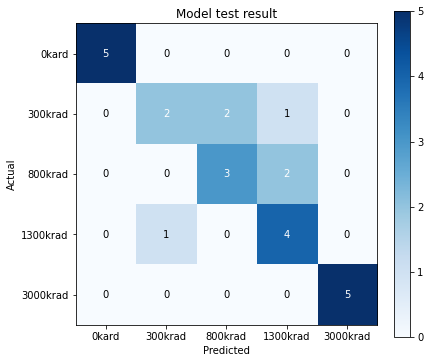

In [62]:
title = 'Model test result'
cmap=plt.cm.Blues
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix2, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
plt.title(title, size=12)
plt.colorbar(fraction=0.05, pad=0.05)
tick_marks = np.arange(5, 5)
plt.xlabel('Predicted')
plt.xticks(np.arange(5), ('0kard', '300krad','800krad', '1300krad', '3000krad'))
plt.ylabel('Actual')
plt.yticks(np.arange(5), ('0kard', '300krad','800krad','1300krad', '3000krad'))


fmt = 'd'
thresh = 1
for i in range(conf_matrix2.shape[0]):
    for j in range(conf_matrix2.shape[1]):
        plt.text(j, i, format(conf_matrix2[i, j], fmt),
                 ha="center", va="center", color="white" if conf_matrix2[i, j] > thresh else "black")  #horizontalalignment